## OneSample

### Import libraries and load data

In [3]:
# data
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('../../data/simple_data.csv', delimiter=',')
print(data)

[[6.7 9.1]
 [4.6 5.9]
 [3.5 4.6]
 [5.5 6.7]]


areas:  [6.7 4.6 3.5 5.5]
prices:  [9.1 5.9 4.6 6.7]
data size:  4


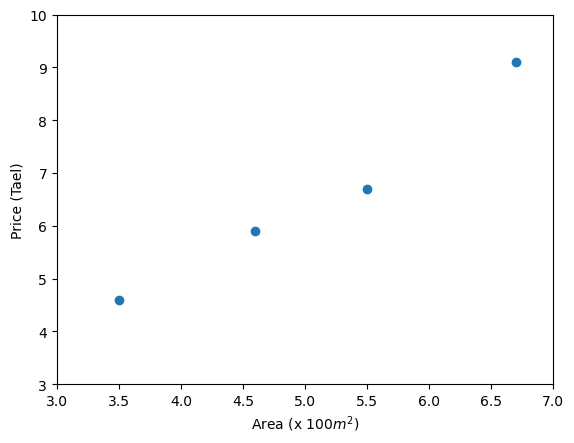

In [15]:
areas = data[:, 0]
prices = data[:, 1]
N = len(areas)

print("areas: ", areas)
print("prices: ", prices)
print("data size: ", N)

# plot the data
plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.xlim(3,7)
plt.ylim(3, 10)
plt.show()

### Training function

In [23]:
# forward
def predict(x, w, b):
    return w * x + b

def compute_gradient(x, y, y_hat):
    dw = x * ((y_hat - y) / abs(y_hat - y))
    db = (y_hat - y) / abs(y_hat - y)
    return dw, db

def update_weight(w, b, dw, db, lr=0.001):
    w = w - lr * dw
    b = b - lr * db
    return w, b

def compute_loss(y_hat, y):
    return abs(y_hat - y)

### Training process

In [27]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epoch_max = 20
losses = [] # for debug

for epoch in range(epoch_max):

    # for an epoch
    for i in range(N):

        # get a sample
        x = areas[i]
        y = prices[i]

        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = compute_loss(y_hat, y)
        # for debug
        losses.append(loss)

        # compute gradient
        dw, db = compute_gradient(x, y, y_hat)

        # update weights
        (w, b) = update_weight(w, b, dw, db, lr)

print(w, b)

1.1859999999999988 0.34000000000000014


In [26]:
# area_real = 6
# w = 1.212
# b = 0.225
# predicted_price = area_real*w + b
# print('predicted_price: ', predicted_price)

predicted_price:  7.497


### Loss visualization

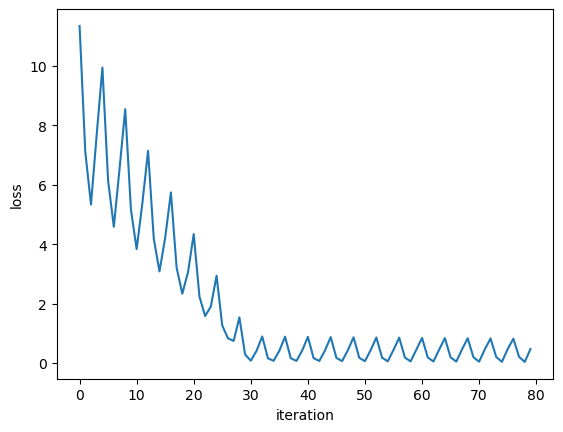

In [28]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

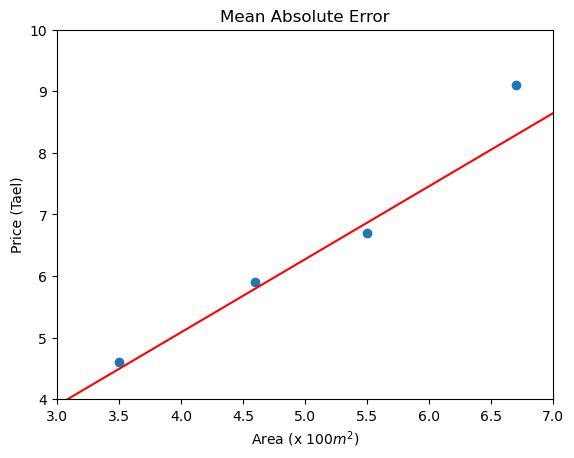

In [29]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

## NSample 

### Import libraries and load data, training function

### Training process

In [30]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epochs = 90
losses = [] # for debug

for epoch in range(epochs):
    epoch_loss = []
    (dw_total, db_total) = (0, 0)
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)


        dw, db = compute_gradient(x, y, y_hat)
        # accumulate
        dw_total = dw_total + dw
        db_total = db_total + db

    # Update weight for each epoch
    w, b = update_weight(w, b, dw_total/N, db_total/N, lr)

    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



In [31]:
print(w, b)

1.213000000000004 0.33500000000000013


### Loss visualization

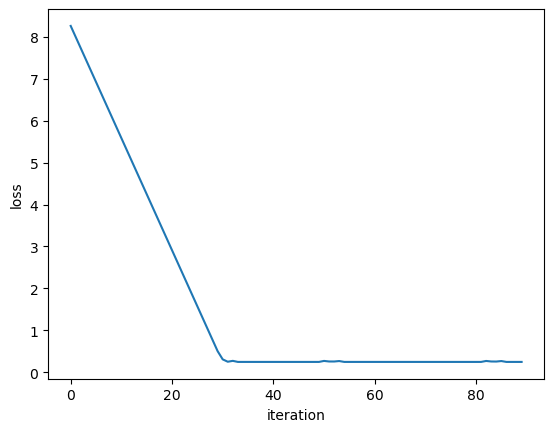

In [32]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Text(0.5, 1.0, 'Mean Absolute Error (Batch)')

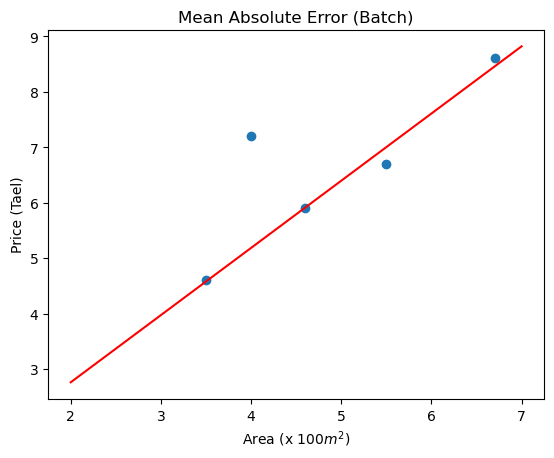

In [46]:
x_data = range(2, 8)
y_data = [w * x + b for x in x_data]
plt.plot(x_data, y_data, 'r')

areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error (Batch)')

## Data Outliers

### Import libraries and load data

areas: [6.7 4.6 3.5 5.5 4. ]
prices: [8.6 5.9 4.6 6.7 7.2]
data_size: 5


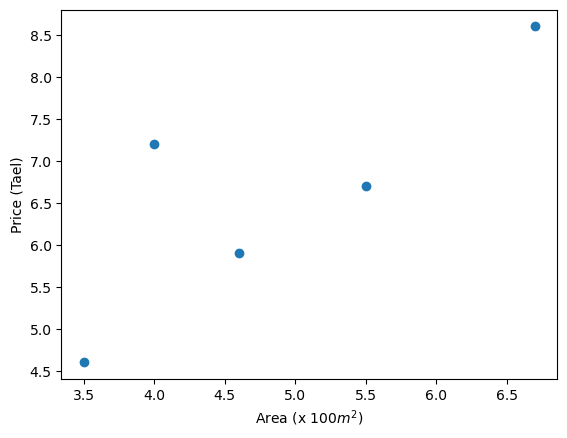

In [48]:
data = np.genfromtxt('../../data/data_outlier.csv', delimiter=',')

areas  = data[:, 0]
prices = data[:, 1]
N = len(areas)

print(f'areas: {areas}')
print(f'prices: {prices}')
print(f'data_size: {N}')

plt.scatter(areas, prices)
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.show()

### Training function
Using the same function as `One Sample` section

### Training process

In [49]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameter
epochs = 20
losses = [] # for debug

for epoch in range(epochs):
    epoch_loss = []
    # for each epoch
    for i in range(N):
        x = areas[i]
        y = prices[i]

        y_hat = predict(x, w, b)

        loss = compute_loss(y_hat, y)
        epoch_loss.append(loss)

        dw, db = compute_gradient(x, y, y_hat)
        w, b = update_weight(w, b, dw, db, lr)
    # loss for each epoch
    mean_loss = np.sum(epoch_loss) / len(epoch_loss)
    losses.append(mean_loss)



In [50]:
print(w, b)

1.1820000000000006 0.34000000000000014


### Loss visualization

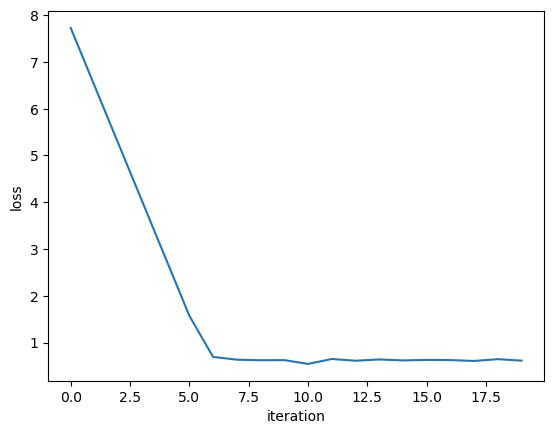

In [51]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

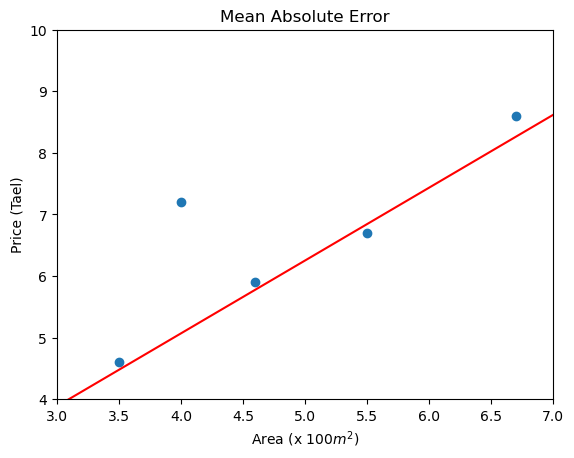

In [52]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

## Data Outliers batch

### Import libraries and load data, training function


### Training process

In [53]:
# init weights
b = 0.04
w = -0.34
lr = 0.01

# parameters
epoch_max = 90
losses = [] # for debug

for epoch in range(epoch_max):

    # for an epoch
    (dw_total, db_total) = (0, 0)
    loss_total = 0.0

    for i in range(N):
        # get a sample
        x = areas[i]
        y = prices[i]

        # predict y_hat
        y_hat = predict(x, w, b)

        # compute loss
        loss = abs(y_hat-y)
        loss_total = loss_total + loss

        # compute gradient
        (dw, db) = compute_gradient(x, y, y_hat)

        # accumulate
        dw_total = dw_total + dw
        db_total = db_total + db

    # for debug
    losses.append(loss_total/N)

    # update weights
    (w, b) = update_weight(w, b, dw_total/N, db_total/N, lr)

print(w, b)

1.2111999999999983 0.34000000000000014


Text(0.5, 1.0, 'Mean Absolute Error')

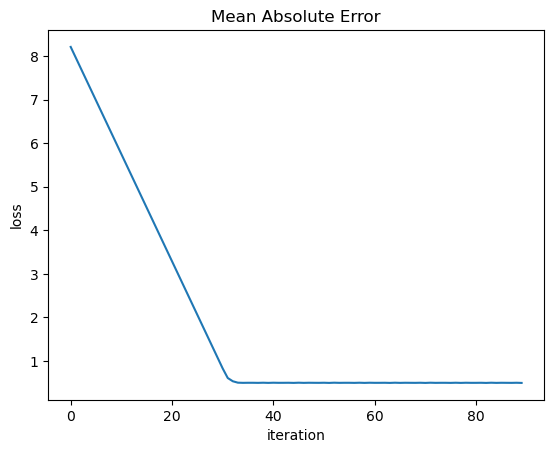

In [54]:
plt.plot(losses)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Mean Absolute Error")

Text(0.5, 1.0, 'Mean Absolute Error (Batch)')

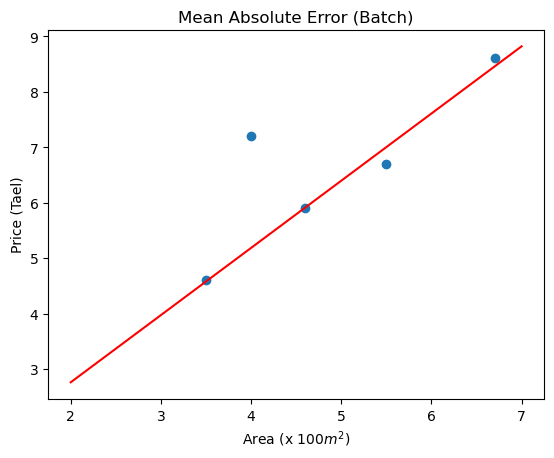

In [55]:
x_data = range(2, 8)
y_data = [w * x + b for x in x_data]
plt.plot(x_data, y_data, 'r')

areas  = data[:, 0]
prices = data[:, 1]
plt.scatter(areas, prices)
#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Absolute Error (Batch)')

Conclusion: It look more precisely for batch case